**Imports**

In [0]:
from keras.datasets import cifar10
from matplotlib import pyplot
%matplotlib inline
from scipy.misc import toimage
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


**Dataset**



1.   A standard computer vision and deep learning dataset for this problem was developed by the Canadian Institute for Advanced Research (CIFAR).
2.   The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes (hence the name CIFAR-10). Classes include common objects such as airplanes, automobiles, birds, cats and so on. The dataset is split in a standard way, where 50,000 images are used for training a model and the remaining 10,000 for evaluating its performance.
3.  The photos are in color with red, green and blue components, but are small measuring 32 by 32 pixel squares.

In [0]:
from google.colab import drive
drive.mount('/content/cnn')

Drive already mounted at /content/cnn; to attempt to forcibly remount, call drive.mount("/content/cnn", force_remount=True).


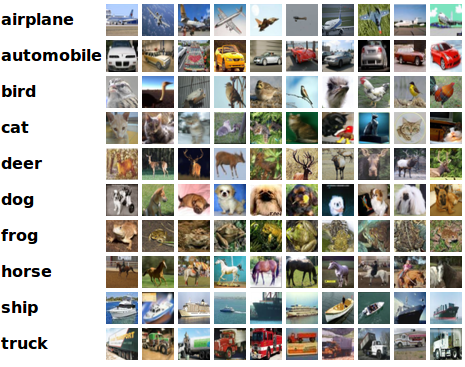

In [0]:
from IPython.display import Image,display
display(Image(filename='/content/cnn/My Drive/CNN_Tutorial/Test_Images/c.png',embed=True))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


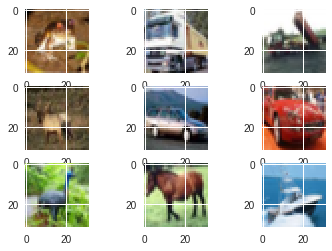

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
pyplot.show()

In [0]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

50000
50000
10000
10000


In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**Pre Processing**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
import keras
from keras import layers
from keras import models

**LeNet Model**

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(32,32,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))


model.add(layers.Conv2D(16, (5,5), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))


model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(84, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 6)         24        
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler
mc = ModelCheckpoint('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Ciphar_drop_batch_LeNet.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/content/cnn/My Drive/CNN_Tutorial/Models and CSV/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Ciphar_drop_batch_LeNet.csv',append=True)
rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
lrate = LearningRateScheduler(step_decay)

In [0]:
from keras import optimizers
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [0]:
history=model.fit(X_train, y_train, validation_split=(0.2), epochs=50, batch_size=32,verbose=2,callbacks=[cv,mc,tb,rp])

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 17s - loss: 1.8418 - acc: 0.3414 - val_loss: 1.5657 - val_acc: 0.4291
Epoch 2/50
 - 16s - loss: 1.5177 - acc: 0.4497 - val_loss: 1.4547 - val_acc: 0.4829
Epoch 3/50
 - 16s - loss: 1.4376 - acc: 0.4816 - val_loss: 1.3604 - val_acc: 0.5163
Epoch 4/50
 - 16s - loss: 1.3850 - acc: 0.5006 - val_loss: 1.2898 - val_acc: 0.5375
Epoch 5/50
 - 16s - loss: 1.3505 - acc: 0.5179 - val_loss: 1.2347 - val_acc: 0.5590
Epoch 6/50
 - 16s - loss: 1.3078 - acc: 0.5342 - val_loss: 1.3021 - val_acc: 0.5362
Epoch 7/50
 - 16s - loss: 1.2812 - acc: 0.5449 - val_loss: 1.2147 - val_acc: 0.5655
Epoch 8/50
 - 16s - loss: 1.2434 - acc: 0.5584 - val_loss: 1.1479 - val_acc: 0.5884
Epoch 9/50
 - 16s - loss: 1.2161 - acc: 0.5670 - val_loss: 1.3671 - val_acc: 0.5239
Epoch 10/50
 - 16s - loss: 1.1916 - acc: 0.5781 - val_loss: 1.1656 - val_acc: 0.5859
Epoch 11/50
 - 16s - loss: 1.1702 - acc: 0.5857 - val_loss: 1

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.8589079145431519
Test accuracy: 0.7031


In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(50)

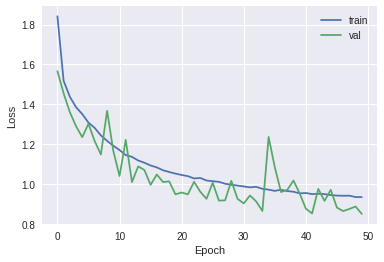

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

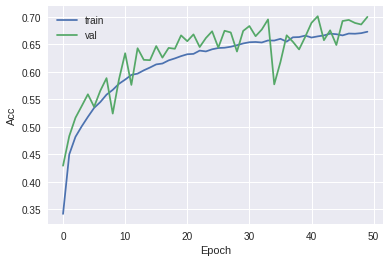

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

**Saving and loading models**

In [0]:
#from keras.models import load_model
#model2 = model.save('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/mnist1.h5')
#model2 = load_model("/content/cnn/My Drive/CNN_Tutorial/Models and CSV/mnist.h5")

**Prediction on Test Image **

2


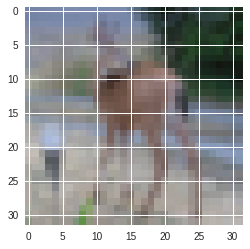

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 100
plt.imshow(X_test[image_index].reshape(32,32,3),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 32, 32, 3))
print(pred.argmax())

1 Actual is  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted is 3
2 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] Predicted is 8
3 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] Predicted is 8
4 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
5 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 4
6 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
7 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
8 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
9 Actual is  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted is 3
10 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
11 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 4
12 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
13 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
14 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7
15 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
16 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] Predicted is 8
17 Actual is  [0. 0. 0. 0. 0. 1. 

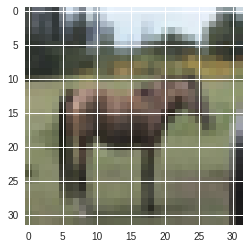

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10000):
    plt.imshow(X_test[i].reshape(32, 32, 3),cmap='Greys')
    pred = model.predict(X_test[i].reshape(1, 32, 32, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(y_test[i])+" Predicted is "+str(pred.argmax()))

#### TensorBoard Visualization

In [0]:
#tensorboard --logdir=/home/student/Documents/ActiveNeuron/Keras/ALL_CSV_MODEL/logs
#tensorboard --logdir=/tmp  --port=8008

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.75      0.75      0.75      1000
     class 1       0.84      0.84      0.84      1000
     class 2       0.63      0.62      0.62      1000
     class 3       0.54      0.48      0.51      1000
     class 4       0.62      0.69      0.65      1000
     class 5       0.67      0.54      0.60      1000
     class 6       0.75      0.79      0.77      1000
     class 7       0.79      0.74      0.77      1000
     class 8       0.74      0.86      0.79      1000
     class 9       0.74      0.79      0.77      1000

   micro avg       0.71      0.71      0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



**Confusion Matrix**

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[751  18  41   8  15   4  10   2 112  39]
 [ 12 836   6   5   1   2  11   3  33  91]
 [ 74   2 617  44  96  47  62  26  18  14]
 [ 22  15  80 483  96 128  73  37  26  40]
 [ 19   3  74  49 687  21  58  56  25   8]
 [ 17   3  63 195  61 536  31  51  25  18]
 [  8   4  38  63  59  10 789   6  12  11]
 [ 13   6  39  30  78  41  11 741  10  31]
 [ 46  32  12  11   5   3   5   4 856  26]
 [ 36  80   7  10   7   4   8  11  44 793]]


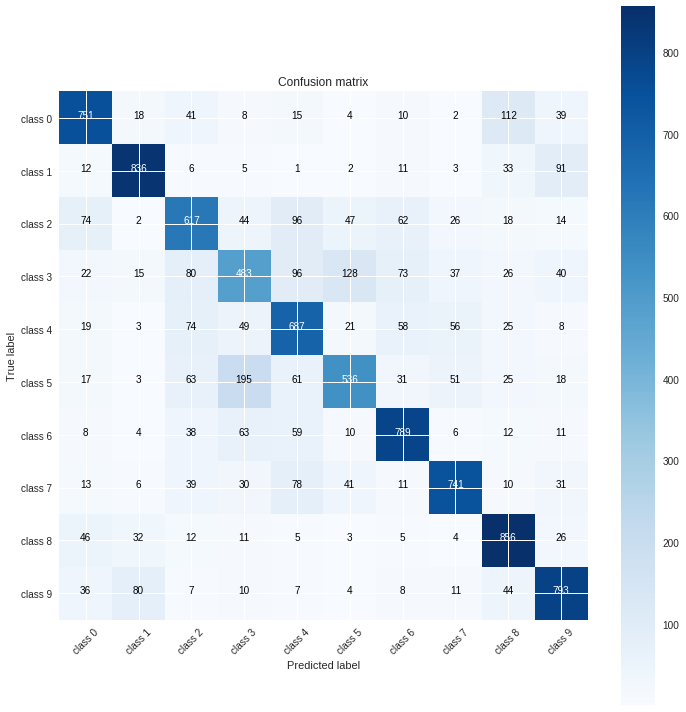

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

**Layers of Model**

In [0]:
for layer in model.layers:
  print(layer)

**Visualizing The Activations**

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,32,32,3))

In [0]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [0]:
print(len(activations))
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

16
(1, 28, 28, 6)
(1, 14, 14, 6)
(1, 14, 14, 6)
(1, 14, 14, 6)
(1, 10, 10, 16)
(1, 5, 5, 16)
(1, 5, 5, 16)
(1, 5, 5, 16)


**Ist Activation (Convolution_1)**

(1, 28, 28, 6)


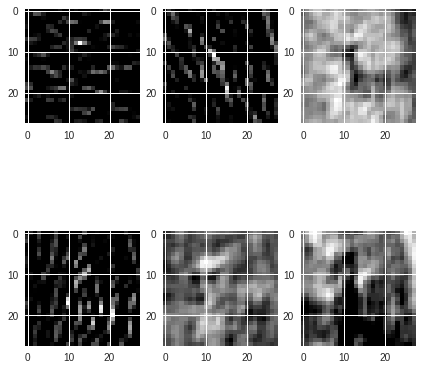

In [0]:
print(activations[0].shape)
display_activation(activations,3,2,0)

**2nd Activation (MaxPool_1)**

(1, 14, 14, 6)


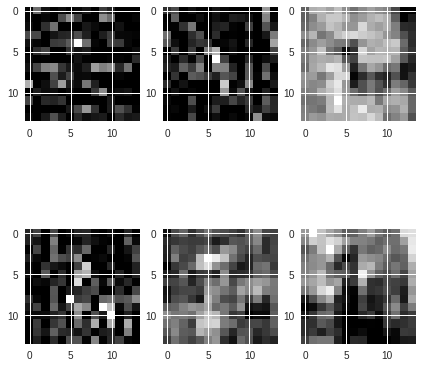

In [0]:
print(activations[1].shape)
display_activation(activations,3,2,1)

**3rd Activation (BatchNorm_1)**

(1, 14, 14, 6)


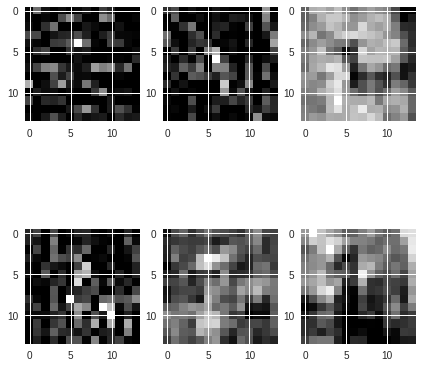

In [0]:
print(activations[2].shape)
display_activation(activations,3,2,2)

**4th Activation (Dropout)**



(1, 14, 14, 6)


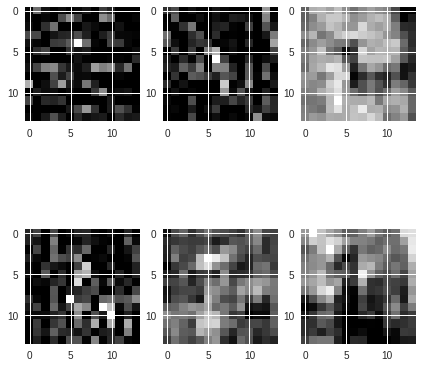

In [0]:
print(activations[3].shape)
display_activation(activations,3,2,3)

**5th Activation (Convolution_2)**

(1, 10, 10, 16)


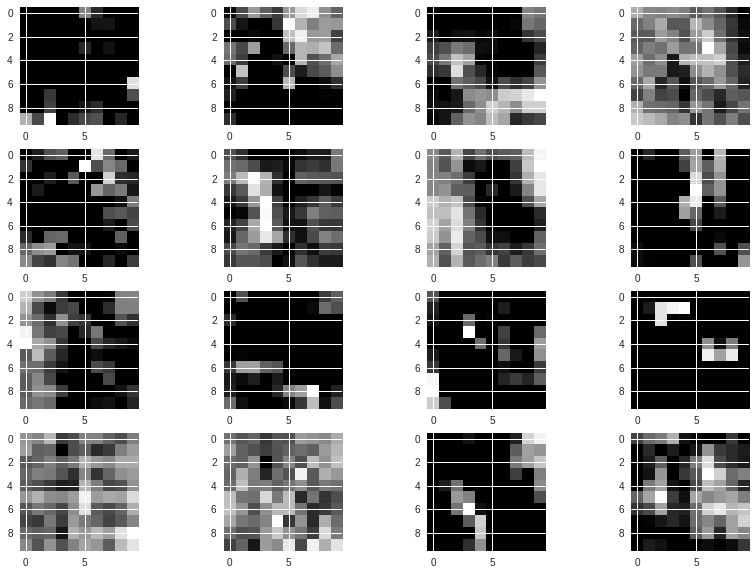

In [0]:
print(activations[4].shape)
display_activation(activations,4,4,4)

**6th Activation (Maxpool_2)**

(1, 5, 5, 16)


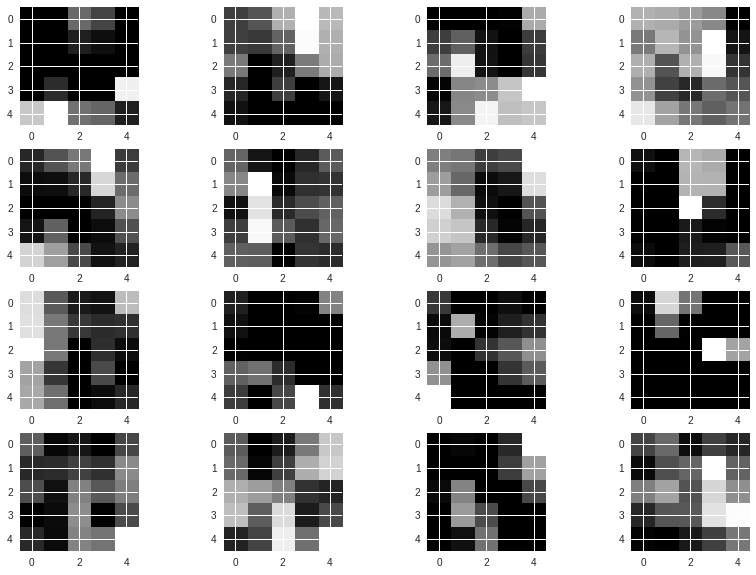

In [0]:
print(activations[5].shape)
display_activation(activations,4,4,5)

**7th Activation (BatchNorm_2)**

(1, 5, 5, 16)


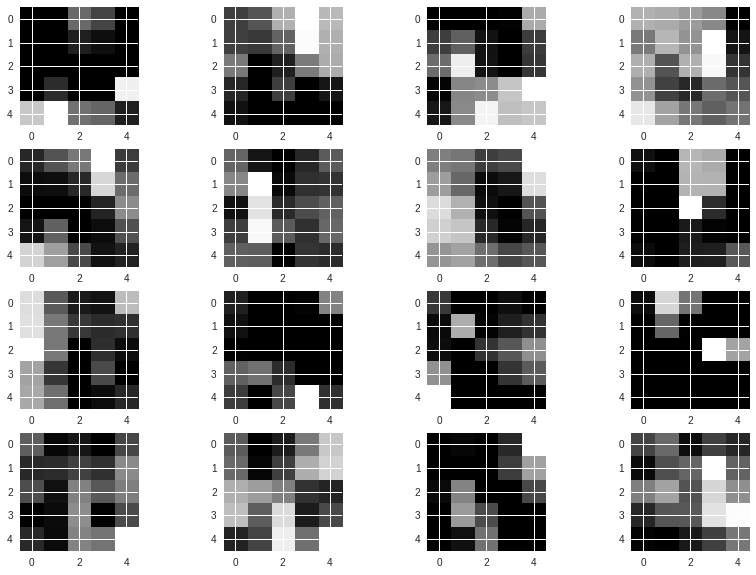

In [0]:
print(activations[6].shape)
display_activation(activations,4,4,6)

**9th Activation (Doropout_2)**

(1, 5, 5, 16)


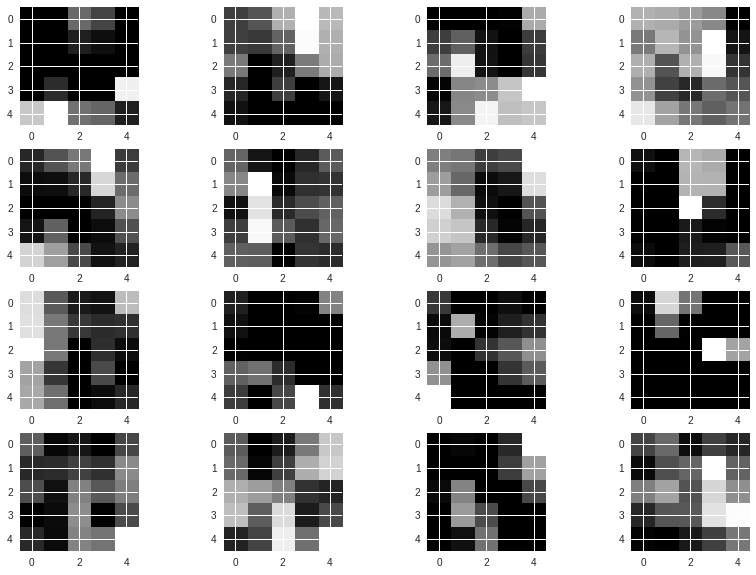

In [0]:
print(activations[7].shape)
display_activation(activations,4,4,7)

**Classification Layer**

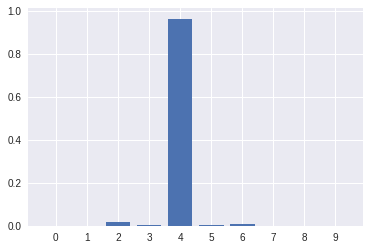

In [0]:
act_dense_3  = activations[15]
 
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

**1st Convolutional Filter **

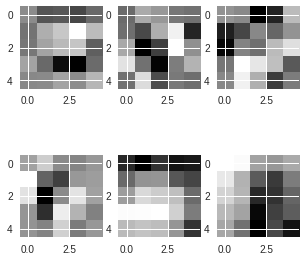

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[ 0.02 -0.22 -0.2  -0.28 -0.12]
 [-0.08  0.18  0.28  0.53  0.24]
 [-0.07  0.13  0.22  0.28 -0.17]
 [ 0.13 -0.12 -0.53 -0.59 -0.12]
 [ 0.01  0.02  0.13  0.03  0.21]]

[[-0.09  0.15  0.08 -0.04 -0.06]
 [-0.07 -0.21  0.16  0.41 -0.35]
 [ 0.14 -0.48 -0.25  0.46  0.05]
 [ 0.36 -0.06 -0.47 -0.02  0.19]
 [-0.06  0.33 -0.2  -0.03 -0.07]]

[[-0.04 -0.07 -0.34 -0.27  0.03]
 [-0.28 -0.2  -0.07 -0.14 -0.04]
 [-0.33 -0.08 -0.12  0.03  0.11]
 [-0.1   0.17  0.12  0.04 -0.16]
 [-0.07  0.14  0.01 -0.22 -0.09]]

[[ 0.04  0.22 -0.05 -0.07 -0.  ]
 [ 0.44 -0.22 -0.36  0.01  0.02]
 [ 0.31 -0.63 -0.05  0.32  0.04]
 [-0.01 -0.44  0.36  0.12 -0.09]
 [-0.01 -0.08  0.24 -0.12 -0.  ]]

[[-0.35 -0.54 -0.3  -0.45 -0.42]
 [-0.03  0.18  0.18 -0.12 -0.21]
 [ 0.22  0.51  0.45  0.38 -0.02]
 [ 0.68  0.69  0.7   0.47  0.06]
 [ 0.36  0.41  0.38  0.18 -0.29]]

[[ 0.24  0.23 -0.04 -0.07 -0.01]
 [ 0.17  0.01 -0.25 -0.35 -0.15]
 [ 0.11  0.02 -0.4  -0.37 -0.22]
 [ 0.03 -0.03 -0.5  -0.33 -0.24]
 [-0.03 -0.18 -0.52 -0.3  -0.46]]

**2nd Convolutional Filter **

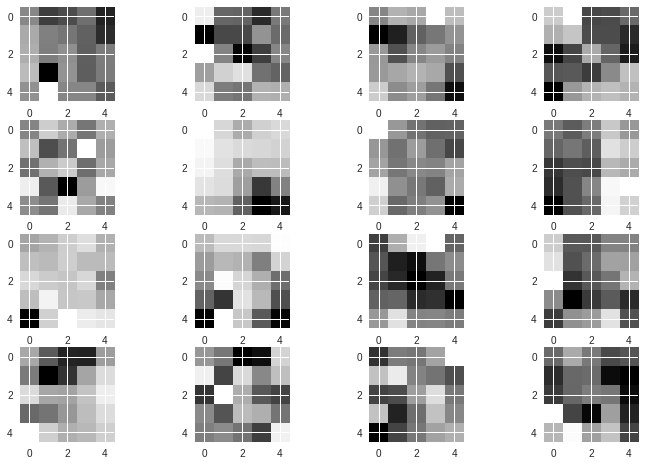

In [0]:
#https://www.codeastar.com/visualize-convolutional-neural-network/
weight_conv2d_2 = model.layers[4].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[ 0.17 -0.18 -0.12  0.05 -0.32]
 [ 0.33  0.13  0.08 -0.02 -0.27]
 [ 0.35  0.12  0.2  -0.03  0.11]
 [ 0.42 -0.49  0.23 -0.03  0.11]
 [ 0.21  0.75  0.16  0.16 -0.05]]

[[ 0.34 -0.09 -0.1  -0.28 -0.03]
 [-0.42 -0.18 -0.18  0.06 -0.07]
 [ 0.4   0.   -0.39 -0.21  0.01]
 [ 0.09  0.25  0.3  -0.05 -0.1 ]
 [ 0.28 -0.02 -0.04  0.15  0.14]]

[[-0.1   0.03 -0.    0.26  0.06]
 [-0.51 -0.41 -0.21 -0.15 -0.06]
 [-0.05 -0.26 -0.1  -0.04 -0.11]
 [-0.05 -0.01  0.03 -0.   -0.27]
 [ 0.1  -0.09 -0.03 -0.15 -0.46]]

[[ 0.2   0.33 -0.15 -0.14 -0.06]
 [ 0.12  0.18 -0.14 -0.14 -0.23]
 [-0.3  -0.16  0.11 -0.08 -0.27]
 [-0.11 -0.11 -0.18  0.02  0.17]
 [-0.34  0.06  0.13  0.16  0.13]]

[[-0.09  0.17  0.05 -0.14  0.06]
 [ 0.12 -0.29 -0.16  0.36 -0.01]
 [-0.16  0.07  0.17 -0.17  0.04]
 [ 0.29 -0.25 -0.58 -0.01  0.33]
 [-0.06 -0.15  0.28  0.04 -0.1 ]]

[[ 0.32  0.01 -0.33 -0.06  0.02]
 [ 0.27  0.09  0.03  0.   -0.04]
 [ 0.23  0.06 -0.35 -0.21 -0.21]
 [ 0.1   0.04 -0.44 -1.24 -0.66]
 [-0.25 -0.27 -0.92 -1.7  -1.51]]